In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# from ann_visualizer.visualize import ann_viz

In [6]:
data = pd.read_csv('audit_risk.csv')
data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

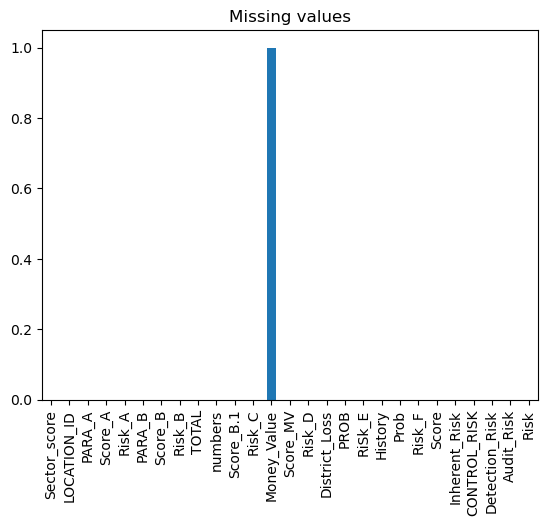

In [8]:
data.isna().sum().plot(kind='bar')
plt.title("Missing values")
plt.show()

In [9]:
data.drop(['LOCATION_ID', 'TOTAL'], axis=1, inplace=True)
data['Money_Value'].fillna((data['Money_Value'].mean()), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   PARA_A          776 non-null    float64
 2   Score_A         776 non-null    float64
 3   Risk_A          776 non-null    float64
 4   PARA_B          776 non-null    float64
 5   Score_B         776 non-null    float64
 6   Risk_B          776 non-null    float64
 7   numbers         776 non-null    float64
 8   Score_B.1       776 non-null    float64
 9   Risk_C          776 non-null    float64
 10  Money_Value     776 non-null    float64
 11  Score_MV        776 non-null    float64
 12  Risk_D          776 non-null    float64
 13  District_Loss   776 non-null    int64  
 14  PROB            776 non-null    float64
 15  RiSk_E          776 non-null    float64
 16  History         776 non-null    int64  
 17  Prob            776 non-null    flo

In [10]:
data.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,5.067655,0.223711,1.152964,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,0.264449,0.080352,0.537417,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,5.000000,0.200000,1.000000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,9.000000,0.600000,5.400000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [11]:
X = data.drop('Risk', axis=1)
y = data.Risk

X.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

C:\Users\WANDIYUSUFKURNIAWAN\anaconda3\lib\site-packages\pandas\io\formats\style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\WANDIYUSUFKURNIAWAN\anaconda3\lib\site-packages\pandas\io\formats\style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Sector_score,1.0,-0.22,-0.43,-0.22,-0.13,-0.22,-0.13,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.17,-0.15,nan,-0.092
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.48,0.15,nan,0.22
Score_A,-0.43,0.5,1.0,0.5,0.25,0.57,0.25,0.24,0.27,0.27,0.21,0.48,0.2,0.089,0.094,0.1,0.18,0.27,0.15,0.72,0.32,0.17,nan,0.2
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.48,0.15,nan,0.22
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.28,0.31,0.3,0.21,0.57,0.2,-0.0047,0.093,0.015,0.2,0.31,0.17,0.9,0.37,0.13,nan,0.21
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.65,0.19,nan,0.89
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,1.0,0.91,0.96,0.19,0.45,0.19,0.13,0.036,0.14,0.2,0.21,0.2,0.5,0.27,0.23,nan,0.22
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.31,0.26,nan,0.26
Risk_C,-0.17,0.14,0.27,0.14,0.22,0.3,0.22,0.96,0.99,1.0,0.22,0.49,0.22,0.15,0.036,0.15,0.22,0.24,0.22,0.55,0.3,0.25,nan,0.25


In [12]:
normalized_X = X / X.mean()
print(normalized_X.var().sort_values(ascending=False))
threshold_var = normalized_X.var() >= 1
X = X.loc[:, threshold_var]
X.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

Risk_F            32.547120
Audit_Risk        29.098920
History           25.881699
Risk_D            23.385972
Risk_B            22.541967
Money_Value       22.167640
PARA_B            21.505270
Inherent_Risk      9.585590
Risk_A             6.484860
PARA_A             5.371838
Sector_score       1.451625
CONTROL_RISK       0.602668
RiSk_E             0.312805
Score_MV           0.301392
Score_B            0.294041
Score_A            0.245496
District_Loss      0.240551
Risk_C             0.217266
Score_B.1          0.129007
Score              0.101007
Prob               0.098383
PROB               0.033093
numbers            0.002723
Detection_Risk     0.000000
dtype: float64


,Sector_score,PARA_A,Risk_A,PARA_B,Risk_B,Money_Value,Risk_D,History,Risk_F,Inherent_Risk,Audit_Risk
Sector_score,1.0,-0.22,-0.22,-0.13,-0.13,-0.12,-0.12,-0.11,-0.1,-0.17,-0.092
PARA_A,-0.22,1.0,1.0,0.16,0.16,0.45,0.45,0.12,0.1,0.48,0.22
Risk_A,-0.22,1.0,1.0,0.17,0.17,0.45,0.45,0.12,0.11,0.48,0.22
PARA_B,-0.13,0.16,0.17,1.0,1.0,0.13,0.12,0.2,0.2,0.65,0.89
Risk_B,-0.13,0.16,0.17,1.0,1.0,0.13,0.12,0.2,0.2,0.65,0.89
Money_Value,-0.12,0.45,0.45,0.13,0.13,1.0,1.0,0.08,0.07,0.83,0.33
Risk_D,-0.12,0.45,0.45,0.12,0.12,1.0,1.0,0.08,0.07,0.83,0.33
History,-0.11,0.12,0.12,0.2,0.2,0.08,0.08,1.0,0.99,0.19,0.33
Risk_F,-0.1,0.1,0.11,0.2,0.2,0.07,0.07,0.99,1.0,0.17,0.33
Inherent_Risk,-0.17,0.48,0.48,0.65,0.65,0.83,0.83,0.19,0.17,1.0,0.75


In [13]:
X = X.drop(['Risk_A', 'Risk_B', 'Risk_D', 'Risk_F'], axis=1)
X.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Sector_score,PARA_A,PARA_B,Money_Value,History,Inherent_Risk,Audit_Risk
Sector_score,1.0,-0.22,-0.13,-0.12,-0.11,-0.17,-0.092
PARA_A,-0.22,1.0,0.16,0.45,0.12,0.48,0.22
PARA_B,-0.13,0.16,1.0,0.13,0.2,0.65,0.89
Money_Value,-0.12,0.45,0.13,1.0,0.08,0.83,0.33
History,-0.11,0.12,0.2,0.08,1.0,0.19,0.33
Inherent_Risk,-0.17,0.48,0.65,0.83,0.19,1.0,0.75
Audit_Risk,-0.092,0.22,0.89,0.33,0.33,0.75,1.0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [15]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train_scaled.shape, X_test_scaled.shape)
print(y_train.shape, y_test.shape)
print("X_train_scaled array:")
print(X_train_scaled)
print("X_test_scaled array:")
print(X_test_scaled)

(620, 7) (156, 7)
(620,) (156,)
X_train_scaled array:
            0         1         2         3         4         5         6
0    1.456590 -0.383186 -0.194351 -0.233513 -0.209291 -0.304822 -0.172317
1   -0.666856 -0.453727 -0.191808 -0.230453 -0.209291 -0.305178 -0.172402
2   -0.750676  0.081662 -0.208156 -0.233513 -0.209291 -0.274247 -0.165041
3    1.456590 -0.441066 -0.210881 -0.233513 -0.209291 -0.309688 -0.173475
4   -0.744924 -0.347011 -0.210881 -0.233513 -0.209291 -0.291809 -0.147404
..        ...       ...       ...       ...       ...       ...       ...
615 -0.666856  1.355020  1.138060 -0.020050  4.912830  0.881657  1.415583
616 -0.666856  0.738237  0.218906  0.432700  1.498083  0.470210  0.204326
617 -0.714929 -0.343394 -0.209610 -0.233513 -0.209291 -0.307275 -0.172900
618 -0.750676  0.054531 -0.203433 -0.233513 -0.209291 -0.274998 -0.165220
619 -0.666856  0.011121 -0.129320 -0.088909  1.498083 -0.193991 -0.111761

[620 rows x 7 columns]
X_test_scaled array:
            0

In [27]:
def keras_classifier(optimizer):
    cf = Sequential()
    cf.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
    cf.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    cf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    cf.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return cf
cf = KerasClassifier(build_fn = keras_classifier)
parameters = {'batch_size': [2, 4, 8, 16],
              'epochs': [32, 64],
              'optimizer': ['adam', 'rmsprop']}
gv_search = GridSearchCV(estimator = cf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)
gv_search = gv_search.fit(X_train_scaled, y_train)
best_param = gv_search.best_params_
best_acc = gv_search.best_score_

print(best_param, best_acc)

Epoch 1/32


C:\Users\WANDIYUSUFKURNIAWAN\AppData\Local\Temp\ipykernel_2448\2033945589.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cf = KerasClassifier(build_fn = keras_classifier)


248/248 [==============================] - 1s 1ms/step - loss: 0.6737 - accuracy: 0.6694
Epoch 2/32
248/248 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.8710
Epoch 3/32
248/248 [==============================] - 0s 911us/step - loss: 0.3383 - accuracy: 0.8810
Epoch 4/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.8871
Epoch 5/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.8952
Epoch 6/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.8972
Epoch 7/32
248/248 [==============================] - 0s 899us/step - loss: 0.2676 - accuracy: 0.8972
Epoch 8/32
248/248 [==============================] - 0s 920us/step - loss: 0.2637 - accuracy: 0.9012
Epoch 9/32
248/248 [==============================] - 0s 880us/step - loss: 0.2587 - accuracy: 0.9073
Epoch 10/32
248/248 [==============================] - 0s 953us/step - loss: 0.2545 - accuracy: 0.9113


248/248 [==============================] - 0s 960us/step - loss: 0.2220 - accuracy: 0.9173
Epoch 18/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2194 - accuracy: 0.9173
Epoch 19/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2184 - accuracy: 0.9194
Epoch 20/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2151 - accuracy: 0.9153
Epoch 21/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2136 - accuracy: 0.9214
Epoch 22/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9173
Epoch 23/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2099 - accuracy: 0.9173
Epoch 24/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2090 - accuracy: 0.9194
Epoch 25/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2060 - accuracy: 0.9214
Epoch 26/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2037 - accuracy: 0.9214


4/4 [==============================] - 0s 1ms/step
Epoch 1/32
248/248 [==============================] - 1s 1ms/step - loss: 0.6869 - accuracy: 0.5948
Epoch 2/32
248/248 [==============================] - 0s 1ms/step - loss: 0.6487 - accuracy: 0.6895
Epoch 3/32
248/248 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.8125
Epoch 4/32
248/248 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8609
Epoch 5/32
248/248 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8770
Epoch 6/32
248/248 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.8790
Epoch 7/32
248/248 [==============================] - 0s 1ms/step - loss: 0.3013 - accuracy: 0.8871
Epoch 8/32
248/248 [==============================] - 0s 999us/step - loss: 0.2883 - accuracy: 0.8871
Epoch 9/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2817 - accuracy: 0.8871
Epoch 10/32
248/248 [==========================

248/248 [==============================] - 0s 1ms/step - loss: 0.2458 - accuracy: 0.9113
Epoch 17/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2449 - accuracy: 0.9173
Epoch 18/32
248/248 [==============================] - 0s 981us/step - loss: 0.2424 - accuracy: 0.9173
Epoch 19/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.9173
Epoch 20/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2392 - accuracy: 0.9153
Epoch 21/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2372 - accuracy: 0.9173
Epoch 22/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.9194
Epoch 23/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2359 - accuracy: 0.9214
Epoch 24/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2328 - accuracy: 0.9214
Epoch 25/32
248/248 [==============================] - 0s 1ms/step - loss: 0.2310 - accuracy: 0.9194


4/4 [==============================] - 0s 1ms/step
Epoch 1/64
248/248 [==============================] - 1s 935us/step - loss: 0.6804 - accuracy: 0.6976
Epoch 2/64
248/248 [==============================] - 0s 968us/step - loss: 0.5729 - accuracy: 0.8831
Epoch 3/64
248/248 [==============================] - 0s 975us/step - loss: 0.4870 - accuracy: 0.8810
Epoch 4/64
248/248 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8911
Epoch 5/64
248/248 [==============================] - 0s 978us/step - loss: 0.4091 - accuracy: 0.8952
Epoch 6/64
248/248 [==============================] - 0s 973us/step - loss: 0.3834 - accuracy: 0.8931
Epoch 7/64
248/248 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.9032
Epoch 8/64
248/248 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8972
Epoch 9/64
248/248 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.9052
Epoch 10/64
248/248 [==================

248/248 [==============================] - 0s 970us/step - loss: 0.3294 - accuracy: 0.9073
Epoch 16/64
248/248 [==============================] - 0s 989us/step - loss: 0.3205 - accuracy: 0.9052
Epoch 17/64
248/248 [==============================] - 0s 977us/step - loss: 0.3145 - accuracy: 0.9052
Epoch 18/64
248/248 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.9093
Epoch 19/64
248/248 [==============================] - 0s 999us/step - loss: 0.3009 - accuracy: 0.9073
Epoch 20/64
248/248 [==============================] - 0s 988us/step - loss: 0.2947 - accuracy: 0.9093
Epoch 21/64
248/248 [==============================] - 0s 993us/step - loss: 0.2893 - accuracy: 0.9133
Epoch 22/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2846 - accuracy: 0.9113
Epoch 23/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.9093
Epoch 24/64
248/248 [==============================] - 0s 976us/step - loss: 0.2752 - accur

248/248 [==============================] - 0s 1ms/step - loss: 0.2133 - accuracy: 0.9194
Epoch 32/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2128 - accuracy: 0.9214
Epoch 33/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2126 - accuracy: 0.9214
Epoch 34/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2111 - accuracy: 0.9254
Epoch 35/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2111 - accuracy: 0.9153
Epoch 36/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2065 - accuracy: 0.9274
Epoch 37/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2077 - accuracy: 0.9214
Epoch 38/64
248/248 [==============================] - 0s 994us/step - loss: 0.2023 - accuracy: 0.9214
Epoch 39/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2041 - accuracy: 0.9234
Epoch 40/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2033 - accuracy: 0.9214


248/248 [==============================] - 0s 998us/step - loss: 0.2081 - accuracy: 0.9315
Epoch 48/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2065 - accuracy: 0.9335
Epoch 49/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2041 - accuracy: 0.9274
Epoch 50/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.9254
Epoch 51/64
248/248 [==============================] - 0s 991us/step - loss: 0.2023 - accuracy: 0.9254
Epoch 52/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.9234
Epoch 53/64
248/248 [==============================] - 0s 1ms/step - loss: 0.1985 - accuracy: 0.9335
Epoch 54/64
248/248 [==============================] - 0s 1ms/step - loss: 0.1982 - accuracy: 0.9274
Epoch 55/64
248/248 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.9294
Epoch 56/64
248/248 [==============================] - 0s 1ms/step - loss: 0.1966 - accuracy: 0.929

248/248 [==============================] - 0s 1ms/step - loss: 0.1755 - accuracy: 0.9274
Epoch 64/64
4/4 [==============================] - 0s 1ms/step
Epoch 1/64
248/248 [==============================] - 1s 1ms/step - loss: 0.6861 - accuracy: 0.5927
Epoch 2/64
248/248 [==============================] - 0s 1ms/step - loss: 0.6401 - accuracy: 0.6230
Epoch 3/64
248/248 [==============================] - 0s 988us/step - loss: 0.5504 - accuracy: 0.7903
Epoch 4/64
248/248 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.8407
Epoch 5/64
248/248 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8730
Epoch 6/64
248/248 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8810
Epoch 7/64
248/248 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8851
Epoch 8/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.8891
Epoch 9/64
248/248 [==========================

248/248 [==============================] - 0s 1ms/step - loss: 0.2378 - accuracy: 0.9133
Epoch 16/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2356 - accuracy: 0.9153
Epoch 17/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2319 - accuracy: 0.9173
Epoch 18/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2287 - accuracy: 0.9133
Epoch 19/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.9173
Epoch 20/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9173
Epoch 21/64
248/248 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9133
Epoch 22/64
248/248 [==============================] - 1s 2ms/step - loss: 0.2237 - accuracy: 0.9173
Epoch 23/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2167 - accuracy: 0.9173
Epoch 24/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9173
Ep

248/248 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.9173
Epoch 32/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2259 - accuracy: 0.9194
Epoch 33/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2233 - accuracy: 0.9234
Epoch 34/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.9194
Epoch 35/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2205 - accuracy: 0.9194
Epoch 36/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2183 - accuracy: 0.9153
Epoch 37/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2171 - accuracy: 0.9194
Epoch 38/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9194
Epoch 39/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2132 - accuracy: 0.9214
Epoch 40/64
248/248 [==============================] - 0s 1ms/step - loss: 0.2119 - accuracy: 0.9153
Ep

248/248 [==============================] - 0s 1ms/step - loss: 0.1950 - accuracy: 0.9194
Epoch 48/64
248/248 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9234
Epoch 49/64
248/248 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.9254
Epoch 50/64
248/248 [==============================] - 0s 2ms/step - loss: 0.1909 - accuracy: 0.9194
Epoch 51/64
248/248 [==============================] - 0s 1ms/step - loss: 0.1919 - accuracy: 0.9194
Epoch 52/64
248/248 [==============================] - 0s 1ms/step - loss: 0.1887 - accuracy: 0.9315
Epoch 53/64
248/248 [==============================] - 1s 2ms/step - loss: 0.1903 - accuracy: 0.9254
Epoch 54/64
248/248 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9234
Epoch 55/64
248/248 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9234
Epoch 56/64
248/248 [==============================] - 0s 1ms/step - loss: 0.1848 - accuracy: 0.9254
Ep

248/248 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.9234
Epoch 64/64
4/4 [==============================] - 0s 1ms/step
Epoch 1/32
124/124 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5625
Epoch 2/32
124/124 [==============================] - 0s 975us/step - loss: 0.6775 - accuracy: 0.6875
Epoch 3/32
124/124 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.8448
Epoch 4/32
124/124 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.8871
Epoch 5/32
124/124 [==============================] - 0s 1ms/step - loss: 0.5196 - accuracy: 0.8891
Epoch 6/32
124/124 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.8871
Epoch 7/32
124/124 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8891
Epoch 8/32
124/124 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8891
Epoch 9/32
124/124 [==========================

Epoch 15/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.9133
Epoch 16/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3057 - accuracy: 0.9133
Epoch 17/32
124/124 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.9173
Epoch 18/32
124/124 [==============================] - 0s 1ms/step - loss: 0.2918 - accuracy: 0.9153
Epoch 19/32
124/124 [==============================] - 0s 1ms/step - loss: 0.2869 - accuracy: 0.9133
Epoch 20/32
124/124 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.9173
Epoch 21/32
124/124 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.9153
Epoch 22/32
124/124 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.9194
Epoch 23/32
124/124 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9173
Epoch 24/32
124/124 [==============================] - 0s 1ms/step - loss: 0.2624 - accurac

124/124 [==============================] - 0s 1ms/step - loss: 0.2363 - accuracy: 0.9093
Epoch 32/32
4/4 [==============================] - 0s 2ms/step
Epoch 1/32
124/124 [==============================] - 1s 1ms/step - loss: 0.6898 - accuracy: 0.5927
Epoch 2/32
124/124 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.7238
Epoch 3/32
124/124 [==============================] - 0s 1ms/step - loss: 0.6452 - accuracy: 0.8548
Epoch 4/32
124/124 [==============================] - 0s 1ms/step - loss: 0.5959 - accuracy: 0.8891
Epoch 5/32
124/124 [==============================] - 0s 1ms/step - loss: 0.5403 - accuracy: 0.8871
Epoch 6/32
124/124 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.8871
Epoch 7/32
124/124 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.8891
Epoch 8/32
124/124 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8931
Epoch 9/32
124/124 [============================

Epoch 15/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8851
Epoch 16/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8871
Epoch 17/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8952
Epoch 18/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8972
Epoch 19/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8992
Epoch 20/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8992
Epoch 21/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3407 - accuracy: 0.9032
Epoch 22/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.9052
Epoch 23/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.9052
Epoch 24/32
124/124 [==============================] - 0s 1ms/step - loss: 0.3229 - accurac

124/124 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.9093
Epoch 32/32
4/4 [==============================] - 0s 1ms/step
Epoch 1/64
124/124 [==============================] - 1s 1ms/step - loss: 0.6906 - accuracy: 0.5907
Epoch 2/64
124/124 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.6411
Epoch 3/64
124/124 [==============================] - 0s 1ms/step - loss: 0.5540 - accuracy: 0.7964
Epoch 4/64
124/124 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.8468
Epoch 5/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8770
Epoch 6/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8770
Epoch 7/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8851
Epoch 8/64
124/124 [==============================] - 0s 1ms/step - loss: 0.3067 - accuracy: 0.8891
Epoch 9/64
124/124 [============================

124/124 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.9113
Epoch 16/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2417 - accuracy: 0.9153
Epoch 17/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9133
Epoch 18/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2364 - accuracy: 0.9153
Epoch 19/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2331 - accuracy: 0.9153
Epoch 20/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2305 - accuracy: 0.9153
Epoch 21/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2278 - accuracy: 0.9153
Epoch 22/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9173
Epoch 23/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.9173
Epoch 24/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.9173
Ep

124/124 [==============================] - 0s 1ms/step - loss: 0.2174 - accuracy: 0.9173
Epoch 32/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2162 - accuracy: 0.9194
Epoch 33/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2141 - accuracy: 0.9173
Epoch 34/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2121 - accuracy: 0.9194
Epoch 35/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2120 - accuracy: 0.9214
Epoch 36/64
124/124 [==============================] - 0s 3ms/step - loss: 0.2093 - accuracy: 0.9194
Epoch 37/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2084 - accuracy: 0.9194
Epoch 38/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.9173
Epoch 39/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2065 - accuracy: 0.9194
Epoch 40/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2037 - accuracy: 0.9214
Ep

124/124 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9173
Epoch 48/64
124/124 [==============================] - 0s 3ms/step - loss: 0.2239 - accuracy: 0.9153
Epoch 49/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9133
Epoch 50/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.9113
Epoch 51/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2184 - accuracy: 0.9173
Epoch 52/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2210 - accuracy: 0.9113
Epoch 53/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2177 - accuracy: 0.9153
Epoch 54/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2150 - accuracy: 0.9133
Epoch 55/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9173
Epoch 56/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2115 - accuracy: 0.9173
Ep

124/124 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.9254
Epoch 64/64
4/4 [==============================] - 0s 2ms/step
Epoch 1/64
124/124 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5806
Epoch 2/64
124/124 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.6008
Epoch 3/64
124/124 [==============================] - 0s 1ms/step - loss: 0.6727 - accuracy: 0.6714
Epoch 4/64
124/124 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.8085
Epoch 5/64
124/124 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.8629
Epoch 6/64
124/124 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.8891
Epoch 7/64
124/124 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.8851
Epoch 8/64
124/124 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8871
Epoch 9/64
124/124 [============================

124/124 [==============================] - 0s 1ms/step - loss: 0.2567 - accuracy: 0.9093
Epoch 16/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2532 - accuracy: 0.9113
Epoch 17/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 0.9113
Epoch 18/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2480 - accuracy: 0.9133
Epoch 19/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9133
Epoch 20/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.9133
Epoch 21/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2401 - accuracy: 0.9133
Epoch 22/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2379 - accuracy: 0.9133
Epoch 23/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2360 - accuracy: 0.9133
Epoch 24/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9153
Ep

124/124 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9234
Epoch 32/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2348 - accuracy: 0.9194
Epoch 33/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9153
Epoch 34/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2312 - accuracy: 0.9194
Epoch 35/64
124/124 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.9234
Epoch 36/64
124/124 [==============================] - 0s 970us/step - loss: 0.2287 - accuracy: 0.9214
Epoch 37/64
124/124 [==============================] - 0s 951us/step - loss: 0.2276 - accuracy: 0.9214
Epoch 38/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2264 - accuracy: 0.9194
Epoch 39/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2250 - accuracy: 0.9234
Epoch 40/64
124/124 [==============================] - 0s 939us/step - loss: 0.2228 - accuracy: 0.9

124/124 [==============================] - 0s 1ms/step - loss: 0.2629 - accuracy: 0.9032
Epoch 48/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2617 - accuracy: 0.9032
Epoch 49/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2582 - accuracy: 0.9032
Epoch 50/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2574 - accuracy: 0.9093
Epoch 51/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2546 - accuracy: 0.9113
Epoch 52/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2534 - accuracy: 0.9113
Epoch 53/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2506 - accuracy: 0.9113
Epoch 54/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.9113
Epoch 55/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.9133
Epoch 56/64
124/124 [==============================] - 0s 1ms/step - loss: 0.2453 - accuracy: 0.9133
Ep

124/124 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9194
Epoch 64/64
4/4 [==============================] - 0s 2ms/step
Epoch 1/32
62/62 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5585
Epoch 2/32
62/62 [==============================] - 0s 1ms/step - loss: 0.6862 - accuracy: 0.5948
Epoch 3/32
62/62 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.5968
Epoch 4/32
62/62 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.6774
Epoch 5/32
62/62 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.8065
Epoch 6/32
62/62 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.8407
Epoch 7/32
62/62 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8669
Epoch 8/32
62/62 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.8750
Epoch 9/32
62/62 [==============================] - 0s 1ms/step 

62/62 [==============================] - 0s 1ms/step - loss: 0.2796 - accuracy: 0.9093
Epoch 17/32
62/62 [==============================] - 0s 1ms/step - loss: 0.2729 - accuracy: 0.9113
Epoch 18/32
62/62 [==============================] - 0s 1ms/step - loss: 0.2693 - accuracy: 0.9153
Epoch 19/32
62/62 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.9133
Epoch 20/32
62/62 [==============================] - 0s 1ms/step - loss: 0.2592 - accuracy: 0.9153
Epoch 21/32
62/62 [==============================] - 0s 1ms/step - loss: 0.2571 - accuracy: 0.9153
Epoch 22/32
62/62 [==============================] - 0s 1ms/step - loss: 0.2534 - accuracy: 0.9173
Epoch 23/32
62/62 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.9214
Epoch 24/32
62/62 [==============================] - 0s 1ms/step - loss: 0.2481 - accuracy: 0.9214
Epoch 25/32
62/62 [==============================] - 0s 1ms/step - loss: 0.2455 - accuracy: 0.9194
Epoch 26/32
62/62 [===

62/62 [==============================] - 1s 1ms/step - loss: 0.6908 - accuracy: 0.5907
Epoch 2/32
62/62 [==============================] - 0s 1ms/step - loss: 0.6833 - accuracy: 0.6855
Epoch 3/32
62/62 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.7903
Epoch 4/32
62/62 [==============================] - 0s 1ms/step - loss: 0.6418 - accuracy: 0.8589
Epoch 5/32
62/62 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.8750
Epoch 6/32
62/62 [==============================] - 0s 1ms/step - loss: 0.5700 - accuracy: 0.8851
Epoch 7/32
62/62 [==============================] - 0s 1ms/step - loss: 0.5338 - accuracy: 0.8851
Epoch 8/32
62/62 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.8871
Epoch 9/32
62/62 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.8851
Epoch 10/32
62/62 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8911
Epoch 11/32
62/62 [===========

62/62 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8851
Epoch 20/32
62/62 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8851
Epoch 21/32
62/62 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8871
Epoch 22/32
62/62 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8891
Epoch 23/32
62/62 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8891
Epoch 24/32
62/62 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8891
Epoch 25/32
62/62 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8911
Epoch 26/32
62/62 [==============================] - 0s 1ms/step - loss: 0.3638 - accuracy: 0.8911
Epoch 27/32
62/62 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8911
Epoch 28/32
62/62 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.8952
Epoch 29/32
62/62 [===

62/62 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5948
Epoch 5/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5948
Epoch 6/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5948
Epoch 7/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.5948
Epoch 8/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6803 - accuracy: 0.5948
Epoch 9/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5948
Epoch 10/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.5948
Epoch 11/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.5948
Epoch 12/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.5948
Epoch 13/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6774 - accuracy: 0.5948
Epoch 14/64
62/62 [========

62/62 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.9113
Epoch 23/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.9113
Epoch 24/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.9113
Epoch 25/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.9113
Epoch 26/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2418 - accuracy: 0.9133
Epoch 27/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.9153
Epoch 28/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2350 - accuracy: 0.9113
Epoch 29/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2320 - accuracy: 0.9153
Epoch 30/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2303 - accuracy: 0.9153
Epoch 31/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2292 - accuracy: 0.9153
Epoch 32/64
62/62 [===

62/62 [==============================] - 0s 1ms/step - loss: 0.3071 - accuracy: 0.9052
Epoch 41/64
62/62 [==============================] - 0s 1ms/step - loss: 0.3051 - accuracy: 0.9052
Epoch 42/64
62/62 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.9052
Epoch 43/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.9093
Epoch 44/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2965 - accuracy: 0.9113
Epoch 45/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.9113
Epoch 46/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2907 - accuracy: 0.9093
Epoch 47/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.9113
Epoch 48/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2842 - accuracy: 0.9113
Epoch 49/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2694 - accuracy: 0.9113
Epoch 50/64
62/62 [===

62/62 [==============================] - 0s 1ms/step - loss: 0.2118 - accuracy: 0.9133
Epoch 59/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9133
Epoch 60/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2111 - accuracy: 0.9153
Epoch 61/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2100 - accuracy: 0.9113
Epoch 62/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2083 - accuracy: 0.9234
Epoch 63/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.9133
Epoch 64/64
4/4 [==============================] - 0s 1ms/step
Epoch 1/64
62/62 [==============================] - 0s 869us/step - loss: 0.6916 - accuracy: 0.5806
Epoch 2/64
62/62 [==============================] - 0s 902us/step - loss: 0.6838 - accuracy: 0.6835
Epoch 3/64
62/62 [==============================] - 0s 949us/step - loss: 0.6565 - accuracy: 0.8488
Epoch 4/64
62/62 [==============================] - 0s 

62/62 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8891
Epoch 12/64
62/62 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8871
Epoch 13/64
62/62 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8911
Epoch 14/64
62/62 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8911
Epoch 15/64
62/62 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8931
Epoch 16/64
62/62 [==============================] - 0s 1ms/step - loss: 0.3898 - accuracy: 0.8931
Epoch 17/64
62/62 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8931
Epoch 18/64
62/62 [==============================] - 0s 1ms/step - loss: 0.3705 - accuracy: 0.8952
Epoch 19/64
62/62 [==============================] - 0s 2ms/step - loss: 0.3613 - accuracy: 0.8952
Epoch 20/64
62/62 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8972
Epoch 21/64
62/62 [===

62/62 [==============================] - 0s 1ms/step - loss: 0.2446 - accuracy: 0.9113
Epoch 30/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2431 - accuracy: 0.9153
Epoch 31/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2410 - accuracy: 0.9153
Epoch 32/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2393 - accuracy: 0.9153
Epoch 33/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2381 - accuracy: 0.9153
Epoch 34/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2359 - accuracy: 0.9153
Epoch 35/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2345 - accuracy: 0.9153
Epoch 36/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2331 - accuracy: 0.9153
Epoch 37/64
62/62 [==============================] - 0s 992us/step - loss: 0.2317 - accuracy: 0.9153
Epoch 38/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2302 - accuracy: 0.9133
Epoch 39/64
62/62 [=

62/62 [==============================] - 0s 1ms/step - loss: 0.2292 - accuracy: 0.9153
Epoch 48/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.9194
Epoch 49/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2273 - accuracy: 0.9194
Epoch 50/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9173
Epoch 51/64
62/62 [==============================] - 0s 992us/step - loss: 0.2252 - accuracy: 0.9214
Epoch 52/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9214
Epoch 53/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.9214
Epoch 54/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2210 - accuracy: 0.9173
Epoch 55/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9234
Epoch 56/64
62/62 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9234
Epoch 57/64
62/62 [=

4/4 [==============================] - 0s 2ms/step
Epoch 1/64
62/62 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.5927
Epoch 2/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.6069
Epoch 3/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6709 - accuracy: 0.6875
Epoch 4/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.7641
Epoch 5/64
62/62 [==============================] - 0s 1ms/step - loss: 0.6190 - accuracy: 0.8286
Epoch 6/64
62/62 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.8548
Epoch 7/64
62/62 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.8669
Epoch 8/64
62/62 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.8690
Epoch 9/64
62/62 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.8770
Epoch 10/64
62/62 [==============================] - 0s 1ms/step - 

31/31 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8952
Epoch 19/32
31/31 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8952
Epoch 20/32
31/31 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8952
Epoch 21/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8952
Epoch 22/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8972
Epoch 23/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3863 - accuracy: 0.8972
Epoch 24/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8972
Epoch 25/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8952
Epoch 26/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8972
Epoch 27/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.9032
Epoch 28/32
31/31 [===

31/31 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.6028
Epoch 4/32
31/31 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.6089
Epoch 5/32
31/31 [==============================] - 0s 1ms/step - loss: 0.6536 - accuracy: 0.6633
Epoch 6/32
31/31 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.7480
Epoch 7/32
31/31 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.8024
Epoch 8/32
31/31 [==============================] - 0s 1ms/step - loss: 0.5414 - accuracy: 0.8407
Epoch 9/32
31/31 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.8649
Epoch 10/32
31/31 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8669
Epoch 11/32
31/31 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.8710
Epoch 12/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.8710
Epoch 13/32
31/31 [=========

31/31 [==============================] - 0s 1ms/step - loss: 0.4253 - accuracy: 0.8911
Epoch 22/32
31/31 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8952
Epoch 23/32
31/31 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8891
Epoch 24/32
31/31 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8911
Epoch 25/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8952
Epoch 26/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8952
Epoch 27/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8952
Epoch 28/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8952
Epoch 29/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8931
Epoch 30/32
31/31 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8972
Epoch 31/32
31/31 [===

31/31 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.7560
Epoch 7/32
31/31 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.7964
Epoch 8/32
31/31 [==============================] - 0s 1ms/step - loss: 0.6317 - accuracy: 0.8246
Epoch 9/32
31/31 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.8528
Epoch 10/32
31/31 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.8710
Epoch 11/32
31/31 [==============================] - 0s 1ms/step - loss: 0.5781 - accuracy: 0.8669
Epoch 12/32
31/31 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.8810
Epoch 13/32
31/31 [==============================] - 0s 1ms/step - loss: 0.5411 - accuracy: 0.8871
Epoch 14/32
31/31 [==============================] - 0s 1ms/step - loss: 0.5240 - accuracy: 0.8790
Epoch 15/32
31/31 [==============================] - 0s 1ms/step - loss: 0.5082 - accuracy: 0.8831
Epoch 16/32
31/31 [======

31/31 [==============================] - 0s 1ms/step - loss: 0.2922 - accuracy: 0.8911
Epoch 25/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.8891
Epoch 26/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2871 - accuracy: 0.8952
Epoch 27/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2849 - accuracy: 0.8952
Epoch 28/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8931
Epoch 29/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.8891
Epoch 30/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2795 - accuracy: 0.8931
Epoch 31/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 0.8952
Epoch 32/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.8911
Epoch 33/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2742 - accuracy: 0.8911
Epoch 34/64
31/31 [===

31/31 [==============================] - 0s 1ms/step - loss: 0.2407 - accuracy: 0.9133
Epoch 43/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2395 - accuracy: 0.9173
Epoch 44/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2384 - accuracy: 0.9194
Epoch 45/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2376 - accuracy: 0.9214
Epoch 46/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 0.9173
Epoch 47/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2360 - accuracy: 0.9234
Epoch 48/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.9214
Epoch 49/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2318 - accuracy: 0.9214
Epoch 50/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2290 - accuracy: 0.9214
Epoch 51/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.9254
Epoch 52/64
31/31 [===

31/31 [==============================] - 0s 1ms/step - loss: 0.2288 - accuracy: 0.9173
Epoch 61/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2274 - accuracy: 0.9173
Epoch 62/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9173
Epoch 63/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.9194
Epoch 64/64
4/4 [==============================] - 0s 1ms/step
Epoch 1/64
31/31 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5968
Epoch 2/64
31/31 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.6069
Epoch 3/64
31/31 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.6089
Epoch 4/64
31/31 [==============================] - 0s 1ms/step - loss: 0.6664 - accuracy: 0.6532
Epoch 5/64
31/31 [==============================] - 0s 1ms/step - loss: 0.6391 - accuracy: 0.7500
Epoch 6/64
31/31 [==============================] - 0s 1ms/step

31/31 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8730
Epoch 15/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3458 - accuracy: 0.8851
Epoch 16/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8891
Epoch 17/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8871
Epoch 18/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3217 - accuracy: 0.8871
Epoch 19/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.8931
Epoch 20/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.8891
Epoch 21/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3066 - accuracy: 0.8891
Epoch 22/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3028 - accuracy: 0.8911
Epoch 23/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2994 - accuracy: 0.8891
Epoch 24/64
31/31 [===

31/31 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.8931
Epoch 33/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2706 - accuracy: 0.8911
Epoch 34/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.8911
Epoch 35/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.8952
Epoch 36/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.8952
Epoch 37/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.9032
Epoch 38/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.8992
Epoch 39/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2625 - accuracy: 0.9032
Epoch 40/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.9032
Epoch 41/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.9032
Epoch 42/64
31/31 [===

31/31 [==============================] - 0s 1ms/step - loss: 0.2368 - accuracy: 0.9153
Epoch 51/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2361 - accuracy: 0.9214
Epoch 52/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2353 - accuracy: 0.9173
Epoch 53/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2342 - accuracy: 0.9173
Epoch 54/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2333 - accuracy: 0.9194
Epoch 55/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2325 - accuracy: 0.9214
Epoch 56/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2319 - accuracy: 0.9214
Epoch 57/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2314 - accuracy: 0.9214
Epoch 58/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2302 - accuracy: 0.9214
Epoch 59/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2293 - accuracy: 0.9214
Epoch 60/64
31/31 [===

Epoch 4/64
31/31 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6976
Epoch 5/64
31/31 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.7520
Epoch 6/64
31/31 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.7903
Epoch 7/64
31/31 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.8165
Epoch 8/64
31/31 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.8427
Epoch 9/64
31/31 [==============================] - 0s 1ms/step - loss: 0.5752 - accuracy: 0.8649
Epoch 10/64
31/31 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.8669
Epoch 11/64
31/31 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.8710
Epoch 12/64
31/31 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.8710
Epoch 13/64
31/31 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.8730
Epoch 14/64
31/3

31/31 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8851
Epoch 23/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8851
Epoch 24/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3111 - accuracy: 0.8871
Epoch 25/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8810
Epoch 26/64
31/31 [==============================] - 0s 1ms/step - loss: 0.3014 - accuracy: 0.8790
Epoch 27/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8851
Epoch 28/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2953 - accuracy: 0.8810
Epoch 29/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8831
Epoch 30/64
31/31 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.8871
Epoch 31/64
31/31 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.8851
Epoch 32/64
31/31 [===

310/310 [==============================] - 0s 1ms/step - loss: 0.1791 - accuracy: 0.9323
Epoch 40/64
310/310 [==============================] - 0s 1ms/step - loss: 0.1782 - accuracy: 0.9339
Epoch 41/64
310/310 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9371
Epoch 42/64
310/310 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9339
Epoch 43/64
310/310 [==============================] - 0s 1ms/step - loss: 0.1737 - accuracy: 0.9371
Epoch 44/64
310/310 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9339
Epoch 45/64
310/310 [==============================] - 0s 1ms/step - loss: 0.1721 - accuracy: 0.9371
Epoch 46/64
310/310 [==============================] - 0s 1ms/step - loss: 0.1705 - accuracy: 0.9403
Epoch 47/64
310/310 [==============================] - 0s 1ms/step - loss: 0.1709 - accuracy: 0.9387
Epoch 48/64
310/310 [==============================] - 0s 1ms/step - loss: 0.1657 - accuracy: 0.9355
Ep

In [46]:
cf = Sequential()
cf.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
cf.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
cf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
cf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cf.fit(X_train_scaled, y_train, batch_size = 2, epochs = 64)
cf.summary()
# ann_viz(cf, title="Artificial Neural Network")

Epoch 1/64
310/310 [==============================] - 1s 2ms/step - loss: 0.6828 - accuracy: 0.6565
Epoch 2/64
310/310 [==============================] - 1s 2ms/step - loss: 0.6112 - accuracy: 0.8710
Epoch 3/64
310/310 [==============================] - 0s 1ms/step - loss: 0.5123 - accuracy: 0.8935
Epoch 4/64
310/310 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8935
Epoch 5/64
310/310 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8935
Epoch 6/64
310/310 [==============================] - 0s 1ms/step - loss: 0.3808 - accuracy: 0.8935
Epoch 7/64
310/310 [==============================] - 0s 934us/step - loss: 0.3556 - accuracy: 0.8903
Epoch 8/64
310/310 [==============================] - 0s 1ms/step - loss: 0.3355 - accuracy: 0.8968
Epoch 9/64
310/310 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.9032
Epoch 10/64
310/310 [==============================] - 0s 1ms/step - loss: 0.3057 - accuracy: 0.90

In [77]:
y_pred = (cf.predict(X_test_scaled) > 0.5)
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred, digits=4))

5/5 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0     0.8738    0.9375    0.9045        96
           1     0.8868    0.7833    0.8319        60

    accuracy                         0.8782       156
   macro avg     0.8803    0.8604    0.8682       156
weighted avg     0.8788    0.8782    0.8766       156



<AxesSubplot:>

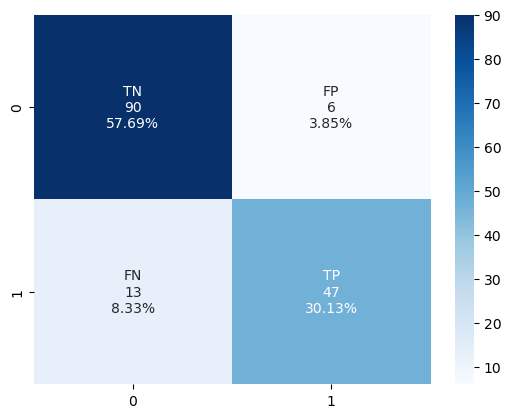

In [60]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')